# US Flight Exploratory Data Analysis(EDA)
## by Chaojun Cao

<a id='intro'></a>
### Preliminary Wrangling
This dataset reports flights in the United States,including carriers, arrival and departure delays, and reasons for delays,
from 2007 to 2008, around 7,751,000 flight records for 2007, and 8,450,121 for 2008. The full data are available from <a>http://stat-computing.org/dataexpo/2009/the-data.html</a>with more detailed variable descriptions.

### Exploratory

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
df1_clean=pd.read_csv('2007_sample_10K.csv')
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
Year                 10000 non-null int64
Month                10000 non-null int64
DayofMonth           10000 non-null int64
DayOfWeek            10000 non-null int64
DepTime              9794 non-null float64
CRSDepTime           10000 non-null int64
ArrTime              9768 non-null float64
CRSArrTime           10000 non-null int64
UniqueCarrier        10000 non-null object
FlightNum            10000 non-null int64
TailNum              10000 non-null object
ActualElapsedTime    9768 non-null float64
CRSElapsedTime       9998 non-null float64
AirTime              9768 non-null float64
ArrDelay             9768 non-null float64
DepDelay             9794 non-null float64
Origin               10000 non-null object
Dest                 10000 non-null object
Distance             10000 non-null int64
TaxiIn               10000 non-null int64
TaxiOut              10000 non-null int64

In [3]:
#load in the csv data
df2_clean=pd.read_csv('2008_sample_10k.csv')
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
Year                 10000 non-null int64
Month                10000 non-null int64
DayofMonth           10000 non-null int64
DayOfWeek            10000 non-null int64
DepTime              9804 non-null float64
CRSDepTime           10000 non-null int64
ArrTime              9783 non-null float64
CRSArrTime           10000 non-null int64
UniqueCarrier        10000 non-null object
FlightNum            10000 non-null int64
TailNum              9880 non-null object
ActualElapsedTime    9781 non-null float64
CRSElapsedTime       10000 non-null float64
AirTime              9781 non-null float64
ArrDelay             9781 non-null float64
DepDelay             9804 non-null float64
Origin               10000 non-null object
Dest                 10000 non-null object
Distance             10000 non-null int64
TaxiIn               9783 non-null float64
TaxiOut              9804 non-null float

In [4]:
df_clean=df1_clean.append(df2_clean, sort=False)
print('The size of combined dataset is: ', df_clean.shape)
df_clean.info()

The size of combined dataset is:  (20000, 29)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 9999
Data columns (total 29 columns):
Year                 20000 non-null int64
Month                20000 non-null int64
DayofMonth           20000 non-null int64
DayOfWeek            20000 non-null int64
DepTime              19598 non-null float64
CRSDepTime           20000 non-null int64
ArrTime              19551 non-null float64
CRSArrTime           20000 non-null int64
UniqueCarrier        20000 non-null object
FlightNum            20000 non-null int64
TailNum              19880 non-null object
ActualElapsedTime    19549 non-null float64
CRSElapsedTime       19998 non-null float64
AirTime              19549 non-null float64
ArrDelay             19549 non-null float64
DepDelay             19598 non-null float64
Origin               20000 non-null object
Dest                 20000 non-null object
Distance             20000 non-null int64
TaxiIn               19783 non

In [5]:
df_clean.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
drop_list=['DayofMonth','FlightNum', 'TailNum','ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'DepDelay', 'TaxiIn', 'TaxiOut','Cancelled', 'CancellationCode', 'Diverted']
df_clean=df_clean.drop(drop_list, axis=1)

In [7]:
df_clean.columns

Index(['Year', 'Month', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'ArrDelay', 'Origin', 'Dest', 'Distance',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay'],
      dtype='object')

In [8]:
column_label=['Year', 'Month', 'Day_Of_Week', 'Dep_Time', 'S_Dep_Time',
       'Arr_Time', 'S_Arr_Time', 'Unique_Carrier',  'Arr_Delay','Origin', 'Dest', 'Distance','Carrier_Delay',
              'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay']

In [9]:
df_clean.columns=column_label
df_clean.rename(columns=lambda x:x.lower(), inplace=True)
df_clean.reset_index(inplace=True, drop=True)
df_clean.head(2)

,year,month,day_of_week,dep_time,s_dep_time,arr_time,s_arr_time,unique_carrier,arr_delay,origin,dest,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2007,10,5,1618.0,1610,1852.0,1847,OO,5.0,PHX,SLC,507,0.0,0.0,0.0,0.0,0.0
1,2007,7,4,1317.0,1326,1546.0,1601,FL,-15.0,HPN,MCO,972,0.0,0.0,0.0,0.0,0.0


In [10]:
time_col=['dep_time', 's_dep_time', 'arr_time', 's_arr_time']

In [11]:
time_columns=df_clean.loc[:,time_col]
time_columns.fillna('999999', inplace=True)
time_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
dep_time      20000 non-null object
s_dep_time    20000 non-null int64
arr_time      20000 non-null object
s_arr_time    20000 non-null int64
dtypes: int64(2), object(2)
memory usage: 625.1+ KB


In [12]:
#for the time columns, change the column format to hh:mm
time_columns=time_columns.astype(str)
time_columns['dep_time']=time_columns['dep_time'].apply(lambda x: x.zfill(6))
time_columns['arr_time']=time_columns['arr_time'].apply(lambda x: x.zfill(6))
time_columns['s_dep_time']=time_columns['s_dep_time'].apply(lambda x: x.zfill(4))
time_columns['s_arr_time']=time_columns['s_arr_time'].apply(lambda x: x.zfill(4))

In [13]:
list1=[]
list2=[]
list3=[]
list4=[]
for i in range(0, time_columns.shape[0]):
    list1.append(time_columns.dep_time[i][0:2]+':'+time_columns.dep_time[i][2:4])
    list2.append(time_columns.arr_time[i][0:2]+':'+time_columns.arr_time[i][2:4])
    list3.append(time_columns.s_dep_time[i][0:2]+':'+time_columns.s_dep_time[i][2:4])
    list4.append(time_columns.s_arr_time[i][0:2]+':'+time_columns.s_arr_time[i][2:4])

In [14]:
len(list1), len(list2), len(list3), len(list4)

(20000, 20000, 20000, 20000)

In [15]:
df_clean['depart_time']=list1
df_clean['arrive_time']=list2
df_clean['schedule_dep_time']=list3
df_clean['schedule_arr_time']=list4

In [16]:
df_clean.drop(['dep_time', 's_dep_time', 'arr_time', 's_arr_time'], axis=1, inplace=True)
df_clean.loc[df_clean.depart_time=='99:99', 'depart_time']=np.nan
df_clean.loc[df_clean.arrive_time=='99:99', 'arrive_time']=np.nan
df_clean.head()

,year,month,day_of_week,unique_carrier,arr_delay,origin,dest,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,depart_time,arrive_time,schedule_dep_time,schedule_arr_time
0,2007,10,5,OO,5.0,PHX,SLC,507,0.0,0.0,0.0,0.0,0.0,16:18,18:52,16:10,18:47
1,2007,7,4,FL,-15.0,HPN,MCO,972,0.0,0.0,0.0,0.0,0.0,13:17,15:46,13:26,16:01
2,2007,11,4,HA,-8.0,HNL,OGG,100,0.0,0.0,0.0,0.0,0.0,14:33,15:06,14:37,15:14
3,2007,6,7,NW,6.0,MSP,DEN,680,0.0,0.0,0.0,0.0,0.0,12:01,13:05,12:00,12:59
4,2007,12,1,DL,5.0,ATL,CMH,446,0.0,0.0,0.0,0.0,0.0,17:18,18:59,17:20,18:54


In [17]:
# melt the delay reseasons to one column, it will gain some number of rows for some flights have several delay reasons.
df_melt=df_clean[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]
df_melt.replace(0.0, np.nan, inplace=True)
df_melt['total']=df_melt.sum(axis=1)
#will use the index as the shared column when do joins later
df_melt=df_melt.reset_index()
df_melt.head()

,index,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,total
0,0,NaN,NaN,NaN,NaN,NaN,0.0
1,1,NaN,NaN,NaN,NaN,NaN,0.0
2,2,NaN,NaN,NaN,NaN,NaN,0.0
3,3,NaN,NaN,NaN,NaN,NaN,0.0
4,4,NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
df_melt.loc[df_melt.total==0.0, ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]=8888

In [19]:
df_melt=pd.melt(df_melt, id_vars=['index','total'], var_name='delay_cause', value_name='delay_minute')
df_melt.head()

,index,total,delay_cause,delay_minute
0,0,0.0,carrier_delay,8888.0
1,1,0.0,carrier_delay,8888.0
2,2,0.0,carrier_delay,8888.0
3,3,0.0,carrier_delay,8888.0
4,4,0.0,carrier_delay,8888.0


In [20]:
df_melt=df_melt[df_melt.delay_minute.notnull()]
df_melt.loc[df_melt.delay_minute==8888, 'delay_cause']=np.nan

In [21]:
df_melt=df_melt.drop_duplicates()
df_melt=df_melt.reset_index(drop=True)
df_melt.head()

,index,total,delay_cause,delay_minute
0,0,0.0,NaN,8888.0
1,1,0.0,NaN,8888.0
2,2,0.0,NaN,8888.0
3,3,0.0,NaN,8888.0
4,4,0.0,NaN,8888.0


In [22]:
df_melt.shape

(22621, 4)

In [23]:
dup_index=df_melt[df_melt['index'].duplicated()]['index']

In [24]:
df_melt.loc[dup_index, :].head()

,index,total,delay_cause,delay_minute
1028,1163,0.0,NaN,8888.0
5406,6221,0.0,NaN,8888.0
6096,7015,0.0,NaN,8888.0
9712,11186,0.0,NaN,8888.0
11626,13392,0.0,NaN,8888.0


In [25]:
df_melt.describe()

,index,total,delay_minute
count,22621.000000,22621.000000,22621.000000
mean,9950.897485,18.907873,6072.809027
std,5763.471840,42.989368,4122.700321
min,0.000000,0.000000,1.000000
25%,4991.000000,0.000000,49.000000
50%,9924.000000,0.000000,8888.000000
75%,14935.000000,22.000000,8888.000000
max,19999.000000,934.000000,8888.000000


In [26]:
df_clean.reset_index(inplace=True)
df_clean.tail()

,index,year,month,day_of_week,unique_carrier,arr_delay,origin,dest,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,depart_time,arrive_time,schedule_dep_time,schedule_arr_time
19995,19995,2008,5,7,WN,25.0,BWI,STL,737,10.0,0.0,10.0,0.0,5.0,08:10,09:25,07:55,09:00
19996,19996,2008,2,3,XE,-11.0,DAL,IAH,217,NaN,NaN,NaN,NaN,NaN,16:00,16:54,16:00,17:05
19997,19997,2008,5,5,WN,-18.0,DEN,OAK,957,NaN,NaN,NaN,NaN,NaN,06:25,07:42,06:25,08:00
19998,19998,2008,5,4,B6,-3.0,JFK,AUS,1522,NaN,NaN,NaN,NaN,NaN,09:12,12:21,09:20,12:24
19999,19999,2008,8,1,WN,4.0,ONT,SMF,389,NaN,NaN,NaN,NaN,NaN,12:41,13:54,12:35,13:50


In [27]:
df_melt.tail()

,index,total,delay_cause,delay_minute
22616,19968,112.0,late_aircraft_delay,99.0
22617,19972,291.0,late_aircraft_delay,19.0
22618,19976,76.0,late_aircraft_delay,76.0
22619,19989,17.0,late_aircraft_delay,17.0
22620,19995,25.0,late_aircraft_delay,5.0


In [28]:
df_clean=pd.merge(df_clean, df_melt, on='index', how='inner')
df_clean.loc[df_clean.delay_minute==8888.0, 'delay_minute']=np.nan
df_clean.drop(['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'], axis=1, inplace=True)
df_clean.delay_minute.replace(8888.0, np.nan, inplace=True)
df_clean.rename(columns={'total':'total_delay'}, inplace=True)
print(df_clean.shape)
print(' ')
df_clean.head()

(22621, 16)
 


,index,year,month,day_of_week,unique_carrier,arr_delay,origin,dest,distance,depart_time,arrive_time,schedule_dep_time,schedule_arr_time,total_delay,delay_cause,delay_minute
0,0,2007,10,5,OO,5.0,PHX,SLC,507,16:18,18:52,16:10,18:47,0.0,NaN,NaN
1,1,2007,7,4,FL,-15.0,HPN,MCO,972,13:17,15:46,13:26,16:01,0.0,NaN,NaN
2,2,2007,11,4,HA,-8.0,HNL,OGG,100,14:33,15:06,14:37,15:14,0.0,NaN,NaN
3,3,2007,6,7,NW,6.0,MSP,DEN,680,12:01,13:05,12:00,12:59,0.0,NaN,NaN
4,4,2007,12,1,DL,5.0,ATL,CMH,446,17:18,18:59,17:20,18:54,0.0,NaN,NaN


In [29]:
df_clean.to_csv('df_clean.csv', index=False)

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22621 entries, 0 to 22620
Data columns (total 16 columns):
index                22621 non-null int64
year                 22621 non-null int64
month                22621 non-null int64
day_of_week          22621 non-null int64
unique_carrier       22621 non-null object
arr_delay            22170 non-null float64
origin               22621 non-null object
dest                 22621 non-null object
distance             22621 non-null int64
depart_time          22219 non-null object
arrive_time          22172 non-null object
schedule_dep_time    22621 non-null object
schedule_arr_time    22621 non-null object
total_delay          22621 non-null float64
delay_cause          7194 non-null object
delay_minute         7194 non-null float64
dtypes: float64(3), int64(5), object(8)
memory usage: 2.9+ MB


In [31]:
conv_to_str=['index','year', 'day_of_week']

for col in conv_to_str:
    df_clean[col]=df_clean[col].astype(str)
    
# for col in conv_to_cat:
#     df_clean[col]=df_clean[col].astype('category')


In [32]:
df_clean.head()

,index,year,month,day_of_week,unique_carrier,arr_delay,origin,dest,distance,depart_time,arrive_time,schedule_dep_time,schedule_arr_time,total_delay,delay_cause,delay_minute
0,0,2007,10,5,OO,5.0,PHX,SLC,507,16:18,18:52,16:10,18:47,0.0,NaN,NaN
1,1,2007,7,4,FL,-15.0,HPN,MCO,972,13:17,15:46,13:26,16:01,0.0,NaN,NaN
2,2,2007,11,4,HA,-8.0,HNL,OGG,100,14:33,15:06,14:37,15:14,0.0,NaN,NaN
3,3,2007,6,7,NW,6.0,MSP,DEN,680,12:01,13:05,12:00,12:59,0.0,NaN,NaN
4,4,2007,12,1,DL,5.0,ATL,CMH,446,17:18,18:59,17:20,18:54,0.0,NaN,NaN


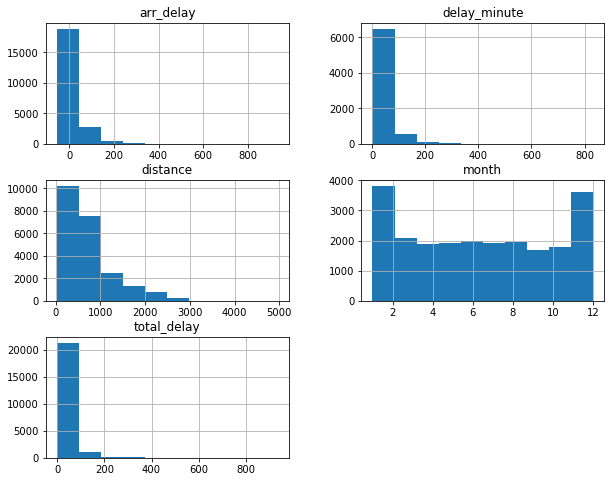

In [33]:
df_clean.hist(figsize=(10,8));

### What is the structure of your dataset?

There are 20,000 flights records in the dataset with 29 features. After some data wrangling process, I have 16 variables with 22621 rows in the data in which some of the variables can be either int or string, like year, month, day of the week, some of the variables can be time format or just string since I will not use them in the analysis later, like depart_time, arrive_time, scheduled_dep_time, schedule_arr_time. I formatted them as hh: mm with string type. All the time measurement columns are floats with unit minutes. 

### What is/are the main feature(s) of interest in your dataset?

When taking flights, my concerns were always about the flight would delay or not. So here, I am very interested in the reasons and causes of delay status, also, the delay situation from different locations and all the carriers. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For the causes and reasons that lead a flight to delay, I think may roughly be divided into two groups: natural causes that are not controllable, the business strategy that is affected by human operations. The data summarized 5 aspects that cause delay:carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay, and we also have the records for each carrier. I am sure those variables will give us good pictures of the delay status.

## Univariate Exploration

For an overview of the dataset, I am very interested in the percentage of the delayed flights in our dataset. As the pie chart below, we can see that there are 50.92% of the total flights delayed, that's a big potion and in the range of the proportion, 24.13% of the delays are from 2008, and 26.79% of the delays are from 2007. So, when taking a flight, we'd better prepare to be patient. 

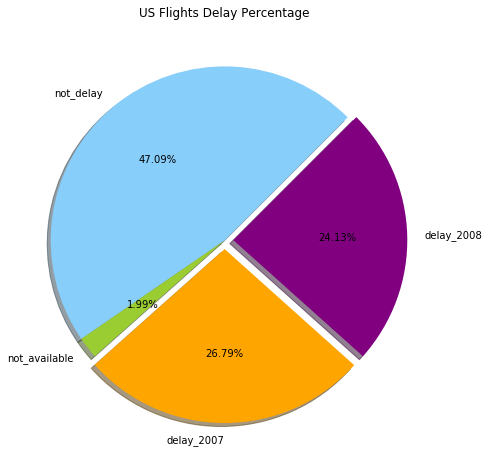

In [34]:
# val1=df_clean[df_clean.arr_delay>0].shape[0]/df_clean.shape[0]
val2=df_clean[df_clean.arr_delay<=0].shape[0]/df_clean.shape[0]
val3=df_clean[df_clean.arr_delay.isnull()].shape[0]/df_clean.shape[0]
val4=df_clean[(df_clean.arr_delay>0 )& (df_clean.year=='2007')].shape[0]/df_clean.shape[0]
val5=df_clean[(df_clean.arr_delay>0 )& (df_clean.year=='2008')].shape[0]/df_clean.shape[0]

value_list=[val2, val3, val4, val5]
label_list=['not_delay', 'not_available', 'delay_2007', 'delay_2008']
color_list=['lightskyblue','yellowgreen', 'orange', 'purple']
explode_list=[0, 0, 0.05, 0.05]
plt.figure(figsize=(8, 8))
plt.pie(value_list, shadow=True, labels=label_list, startangle=45, autopct='%.2f%%', colors=color_list, explode=explode_list)
plt.title('US Flights Delay Percentage')
plt.show()

I'll start by looking at the distribution of the main variable of interest: arrive delay.

In [35]:
df_clean.arr_delay.describe()

count    22170.000000
mean        15.712404
std         45.704009
min        -55.000000
25%         -8.000000
50%          1.000000
75%         23.000000
max        934.000000
Name: arr_delay, dtype: float64

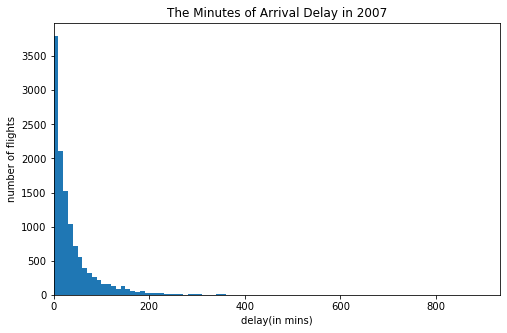

In [36]:
bins = np.arange(0, df_clean['arr_delay'].max()+10,10)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'arr_delay', bins = bins)
plt.title('The Minutes of Arrival Delay in 2007')
plt.xlim(0,934)
plt.xlabel('delay(in mins)')
plt.ylabel('number of flights')
plt.show()

The histogram has a long tail on the right, and most of the data fall in the range from 0 to 200 minutes. In order to see the distribution more closely, I will plot the data using a log-scale.

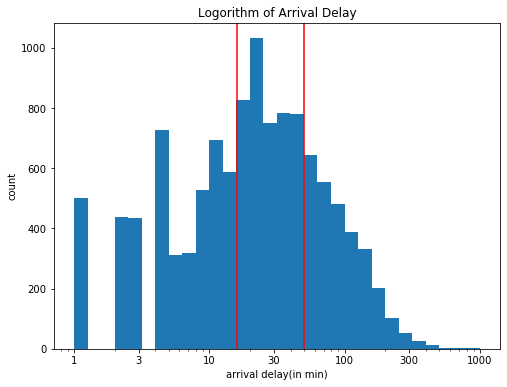

In [37]:
bin_edges = 10 ** np.arange(0, np.log10(df_clean.arr_delay.max())+0.1, 0.1);
plt.figure(figsize=(8,6));
plt.hist(data=df_clean, x='arr_delay', bins = bin_edges);
plt.title('Logorithm of Arrival Delay')
plt.xlabel('arrival delay(in min)')
plt.ylabel('count')
plt.xscale('log');
tick_locs = [1,3,10, 30, 100, 300, 1000];
plt.xticks(tick_locs, tick_locs);
line=[16,50]
for i in line:
    plt.axvline(x=i, color='red')

When using the log-scale to plot the data, we can see that the arrive delay data shows a unimodal distribution with peak between 15 and 50 minutes. 

In [38]:
val4=df_clean[(df_clean.arr_delay>0 )& (df_clean.year==2007)].shape[0]
val5=df_clean[(df_clean.arr_delay>0 )& (df_clean.year==2008)].shape[0]

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22621 entries, 0 to 22620
Data columns (total 16 columns):
index                22621 non-null object
year                 22621 non-null object
month                22621 non-null int64
day_of_week          22621 non-null object
unique_carrier       22621 non-null object
arr_delay            22170 non-null float64
origin               22621 non-null object
dest                 22621 non-null object
distance             22621 non-null int64
depart_time          22219 non-null object
arrive_time          22172 non-null object
schedule_dep_time    22621 non-null object
schedule_arr_time    22621 non-null object
total_delay          22621 non-null float64
delay_cause          7194 non-null object
delay_minute         7194 non-null float64
dtypes: float64(3), int64(2), object(11)
memory usage: 2.9+ MB


In [40]:
mask=df_clean.arr_delay>0
delay_flight=df_clean[mask]

In [41]:
delay_flight.year==2007

0        False
3        False
4        False
5        False
6        False
         ...  
22613    False
22614    False
22615    False
22616    False
22620    False
Name: year, Length: 11518, dtype: bool

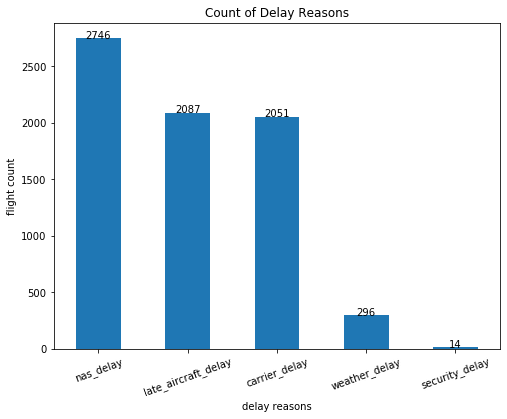

In [42]:
plt.figure(figsize=(8,6));
delay_flight.delay_cause.value_counts().plot(kind='bar');
plt.title('Count of Delay Reasons');
plt.ylabel('flight count');
plt.xticks(rotation=20);
plt.xlabel('delay reasons');

locs, labels=plt.xticks()
counts=delay_flight.delay_cause.value_counts()
for loc, label in zip(locs, labels):
    count=counts[label.get_text()]
    plt.text(loc, count, count, ha='center', color='black' )

Among all the delay reasons, National Air System Delay,Late Aircraft Delay and Carrier Delay have the most counts, flights delayed for bad weather and security have much smaller count. 

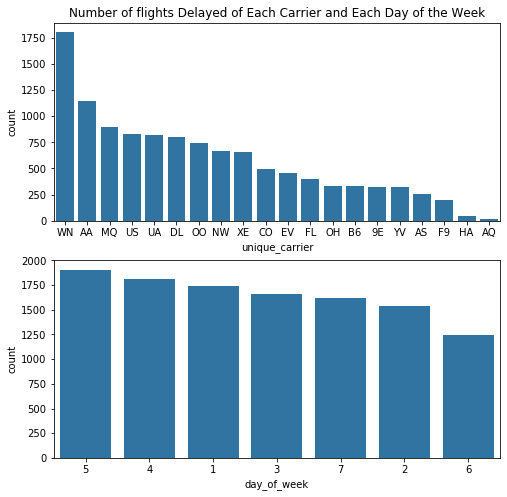

In [43]:
fig, ax = plt.subplots(nrows=2,figsize = [8,8]);
default_color = sb.color_palette()[0]

carrier_order=delay_flight.unique_carrier.value_counts().index
day_order=delay_flight.day_of_week.value_counts().index
sb.countplot(data = delay_flight, color=default_color,x = 'unique_carrier', order=carrier_order, ax = ax[0]);
ax[0].set_title('Number of flights Delayed of Each Carrier and Each Day of the Week');
sb.countplot(data = delay_flight, color=default_color,x = 'day_of_week',order=day_order, ax = ax[1]);
plt.show()

For the 20 unique carriers, we can see from the chart above that WN, AA, MQ which are Southwest Airlines Co., American Airlines Inc. and American Eagle Airlines Inc., and the delay flights distribution on each day chart shows that Fridays, Thursdays and Mondays seems have slightly more delays than other day of the week. 

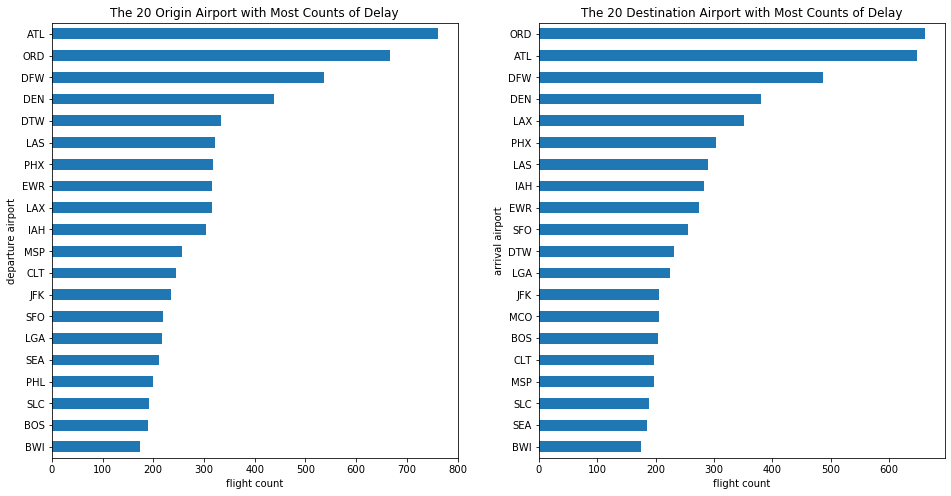

In [44]:
origin_20=delay_flight.origin.value_counts().sort_values(ascending=True).tail(20)
dest_20=delay_flight.dest.value_counts().sort_values(ascending=True).tail(20)

plt.figure(figsize=(16,8));
plt.subplot(1,2,1);
origin_20.plot(kind='barh');
plt.title('The 20 Origin Airport with Most Counts of Delay');
plt.ylabel('departure airport');
plt.xlabel('flight count');

plt.subplot(1,2,2);
dest_20.plot(kind='barh');
plt.title('The 20 Destination Airport with Most Counts of Delay');
plt.ylabel('arrival airport');
plt.xlabel('flight count');

plt.show()

ATL, ORD, DFW, DEN have the most delays no matter flight depart or arrive from those airports. 

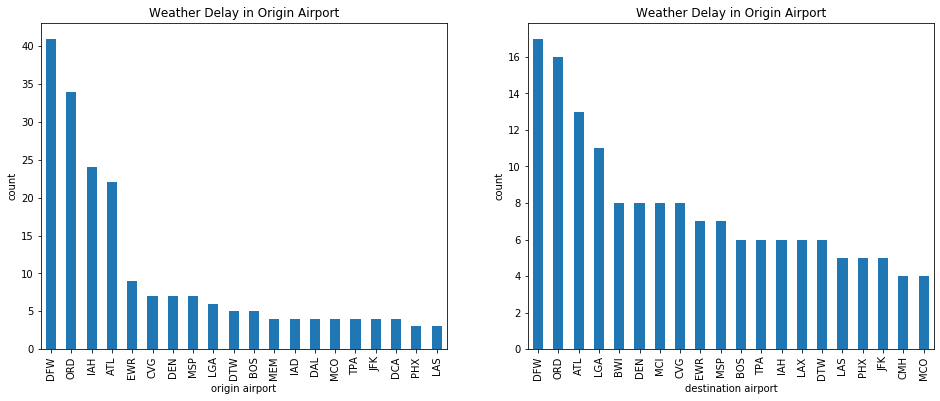

In [45]:
fig, ax = plt.subplots(ncols=2,figsize = [16,6]);
delay_flight[delay_flight.delay_cause=='weather_delay'].origin.value_counts().head(20).plot(kind='bar',
                                            title='Weather Delay in Origin Airport',ax=ax[0]);
ax[0].set(xlabel='origin airport', ylabel='count');

delay_flight[delay_flight.delay_cause=='weather_delay'].dest.value_counts().head(20).plot(kind='bar',
                                            title='Weather Delay in Origin Airport',ax=ax[1]);
ax[1].set(xlabel='destination airport', ylabel='count');
plt.show();

DFW(Dallas/Fort Worth International Airport)-DFW Airport, ORD(O'Hare International Airport)-Chicago, IAH(George Bush Intercontinental Airport)-Houston, ATL(Hartsfield-Jackson Atlanta International Airport)-Atlanta have the most weather delays. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The arrival delay variable is the variable of interest and the distribution of the delay variable has a long tail to the right. So, I perform the log transform of the data. Under the transformation, the data shows unimodal distribution with one peak between 10 minutes and 30 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The features that I am interested in are the reasons, causes, locations and carriers that affect the time of delay. From the univariate charts above we can see that the nas_delay has the most count, and the security_delay has the least. The distributions of delay in carriers, day-of-the-week are reasonable to me, DFW Airport, Chicago, Houston, and Atlanta have the most weather delays, and I believe the airports in the rank of most delays will have some connections with the causes. The causes of the delay should be in one column, after melt the five columns and cleaned some data type quality issues, the data is clean and tidy. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [46]:
numeric_vars = df_clean.describe().columns

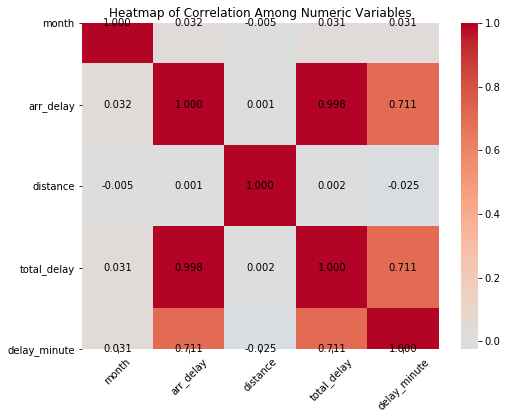

In [47]:
# correlation plot
plt.figure(figsize = [8, 6]);
sb.heatmap(delay_flight.corr(), annot = True, fmt = '0.3f',cmap = 'coolwarm', center=0,annot_kws={'color': 'black'});
plt.title('Heatmap of Correlation Among Numeric Variables');
plt.xticks(rotation=45);
plt.yticks(rotation=0);
plt.show();

From the heatmap, the distance of each flight has no correlation with any other variable, and the arrive delay variable only correlated to the delay count in minutes which we know already. So, for all the numeric variables, there is no strong evidence that they are correlated to each other. 

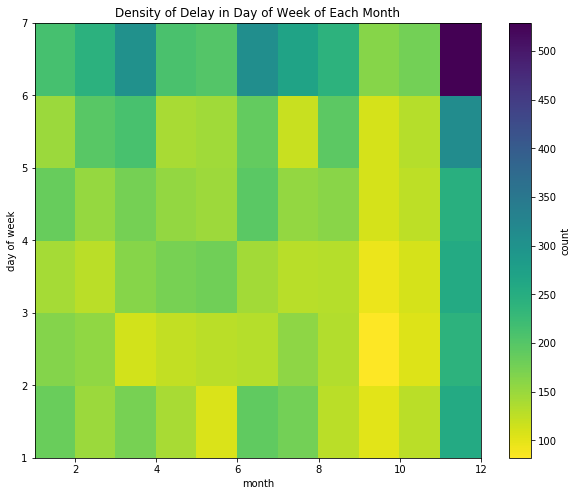

In [48]:
delay_flight.day_of_week=delay_flight.day_of_week.astype(int)
xbin_edges = np.arange(1,13,1)
ybin_edges = np.arange(1,8,1)
plt.figure(figsize=(10,8));
plt.hist2d(data = delay_flight, x = 'month', y = 'day_of_week',
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
plt.title('Density of Delay in Day of Week of Each Month');
plt.xlabel('month');
plt.ylabel('day of week');
plt.colorbar(label = 'count');

The heatmap above shows that on December generally has more delay, and for the day of week, Sunday has more delays. And we see that the most count of delay is on the December and Sunday combination area. 

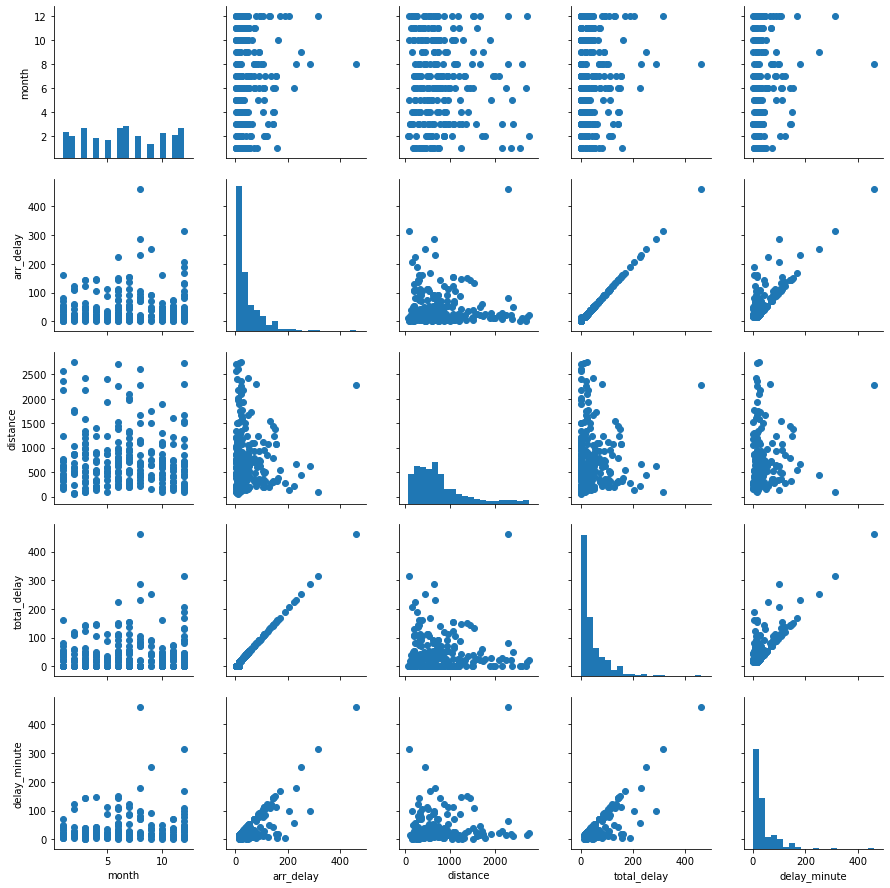

In [49]:
samples = np.random.choice(delay_flight.shape[0], 500, replace = False)
df_samp = delay_flight.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

The scatter-histogram plot also show the same features as the heatmap which are meet our expectations 

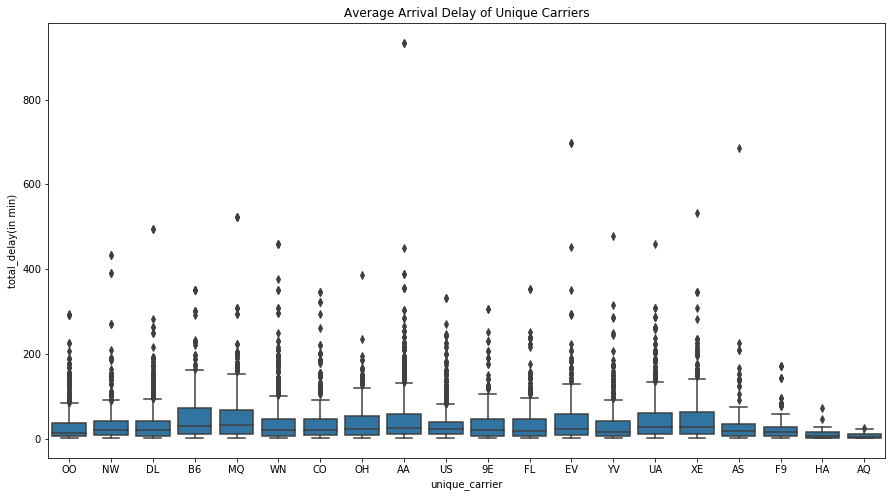

In [50]:
plt.figure(figsize=(15,8));
base_color = sb.color_palette()[0]
sb.boxplot(data = delay_flight, x = 'unique_carrier',  y = 'arr_delay',color = base_color);
plt.title('Average Arrival Delay of Unique Carriers');
plt.ylabel('total_delay(in min)');

After compared the frequency of each feature against the target variable, I also try to compare the average of each feature against the target variable. From the pointplot below we can clearly compare the average delay among the unique carriers in each year. Compare each carrier with itself in different years, each carrier doesn't have big changes, but B6 has a very high average delay and F9, HA, AQ have the lowest average delay in minutes in each year. 

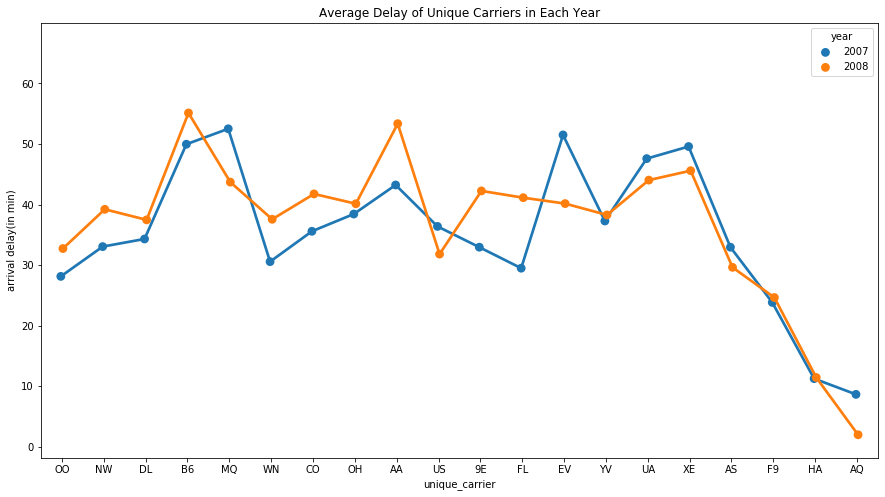

In [51]:
plt.figure(figsize=(15,8));
base_color = sb.color_palette()[0]
sb.pointplot(data = delay_flight, x = 'unique_carrier',  y = 'arr_delay',hue='year', errwidth=0, dodge=True);
plt.title('Average Delay of Unique Carriers in Each Year');
plt.ylabel('arrival delay(in min)');

The boxplot for the unique carriers on the total delay in minutes. From previous chart we know that WN has the most count of delay, but from here we can see that, a lot of other carriers have longer delay than WN. 

<Figure size 1440x720 with 0 Axes>

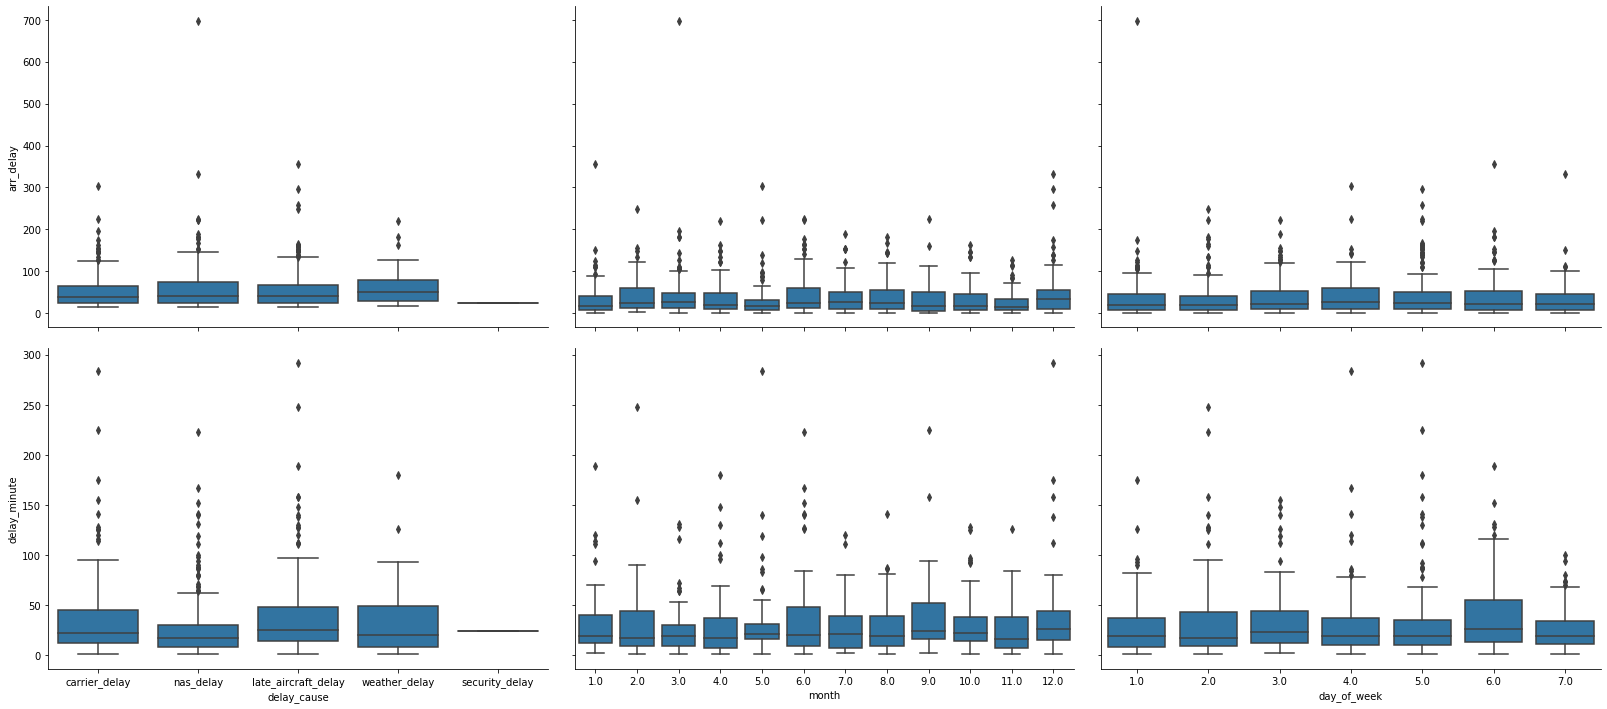

In [52]:
samples = np.random.choice(delay_flight.shape[0], 2000, replace = False)
flight_samp = delay_flight.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 10]);
g = sb.PairGrid(data = flight_samp, y_vars = ['arr_delay', 'delay_minute'], x_vars = ['delay_cause','month', 'day_of_week'],
                size = 5,aspect=1.5);
g.map(boxgrid);
plt.show();

The boxplots above show the relation ship between every pair in arrival delay, delay minutes of each reason, delay causes, month and day_of_week. In total, we can see that weather delay, December have the highest average delay in arrival delay, but within each delay causes, late aircraft delay, Jan have the highest average delay. 

<Figure size 1440x720 with 0 Axes>

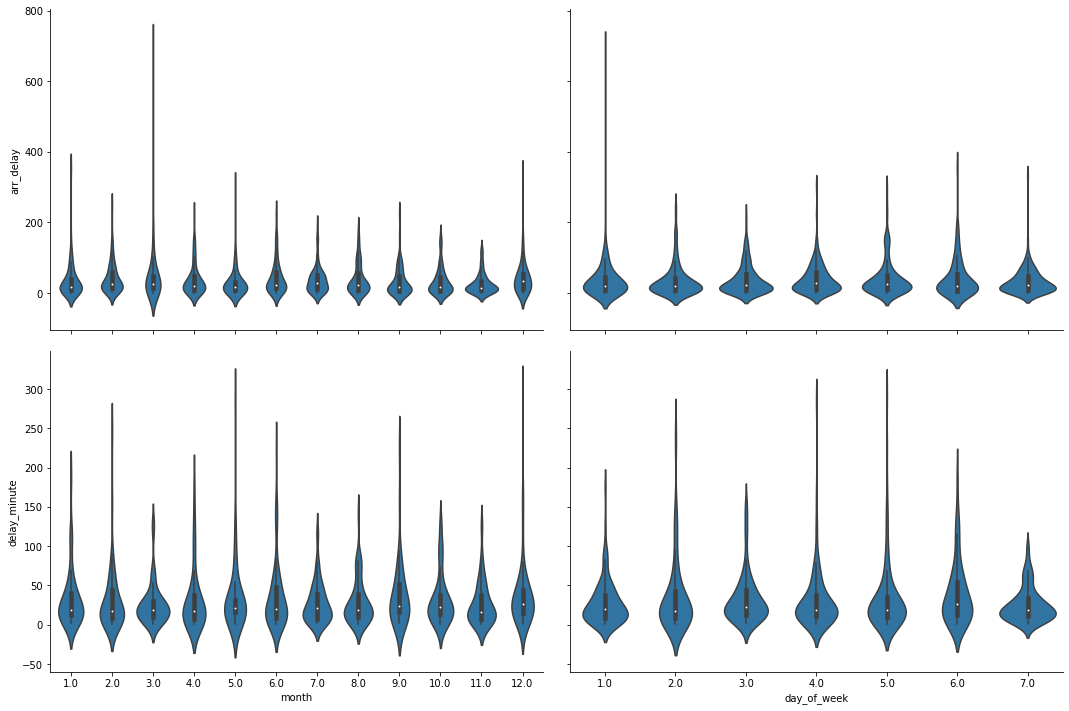

In [53]:
def violingrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.violinplot(x, y, color = default_color)

plt.figure(figsize = [20, 10]);
g = sb.PairGrid(data = flight_samp, y_vars = ['arr_delay', 'delay_minute'], x_vars = ['month', 'day_of_week'],
                size = 5,aspect=1.5);
g.map(violingrid);
plt.show();

The violin plots show the similar data with the boxplot, but violin can show the skewness of the data instead of a average value. 

In [54]:
delay_trans=delay_flight.groupby('month')['delay_cause'].value_counts()
delay_trans=pd.DataFrame(delay_trans, index=None)
delay_trans.columns=['count']
delay_trans.reset_index(inplace=True)

In [55]:
delay_trans=delay_trans.pivot(index='month', columns='delay_cause', values='count').reset_index().rename_axis(None, axis=1)
delay_trans

,month,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
0,1,185.0,155.0,270.0,1.0,30.0
1,2,187.0,204.0,242.0,1.0,29.0
2,3,216.0,214.0,287.0,3.0,31.0
3,4,157.0,169.0,236.0,NaN,12.0
4,5,133.0,153.0,211.0,3.0,20.0
5,6,223.0,227.0,290.0,3.0,38.0
6,7,167.0,193.0,248.0,NaN,44.0
7,8,195.0,198.0,219.0,1.0,26.0
8,9,117.0,88.0,117.0,1.0,8.0
9,10,125.0,130.0,185.0,1.0,12.0


In [56]:
norm_carrier = (delay_trans['carrier_delay'] - delay_trans['carrier_delay'].min()) / (delay_trans['carrier_delay'].max() - delay_trans['carrier_delay'].min())
norm_weather = (delay_trans['weather_delay'] - delay_trans['weather_delay'].min()) / (delay_trans['weather_delay'].max() - delay_trans['weather_delay'].min())
norm_air = (delay_trans['late_aircraft_delay'] - delay_trans['late_aircraft_delay'].min()) / (delay_trans['late_aircraft_delay'].max() - delay_trans['late_aircraft_delay'].min())
norm_nas = (delay_trans['nas_delay'] - delay_trans['nas_delay'].min()) / (delay_trans['nas_delay'].max() - delay_trans['nas_delay'].min())

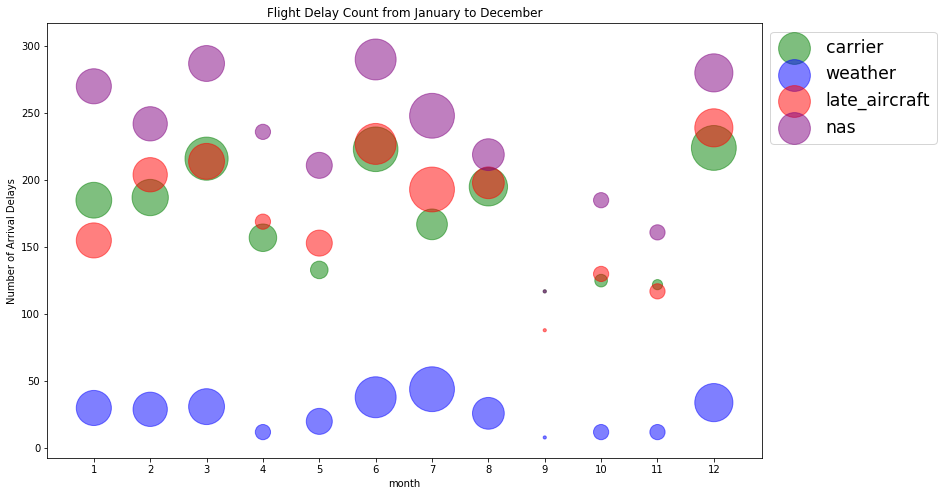

In [57]:
ax0 = delay_trans.plot(kind='scatter',x='month', y='carrier_delay',figsize=(16, 8), alpha=0.5, color='green',s=norm_carrier*2000+10,
                       xticks=np.arange(0,13,1));

ax1 = delay_trans.plot(kind='scatter',x='month',y='weather_delay',alpha=0.5,color="blue",s=norm_weather*2000+10,ax=ax0);
ax2 = delay_trans.plot(kind='scatter',x='month',y='late_aircraft_delay',alpha=0.5,color="red",s=norm_weather*2000+10,ax=ax0);
ax3 = delay_trans.plot(kind='scatter',x='month',y='nas_delay',alpha=0.5,color="purple",s=norm_weather * 2000+10,ax=ax0);

ax0.set_ylabel('Number of Arrival Delays');
ax0.set_title('Flight Delay Count from January to December');

# Shrink current axis's height by 20% on the width
box = ax0.get_position();
ax0.set_position([box.x0, box.y0, box.width*0.8, box.height]);
# Put a legend on the side of current axis
ax0.legend(['carrier', 'weather', 'late_aircraft','nas'],loc='upper left', bbox_to_anchor=(1, 1),fontsize='xx-large' );

In this normalized scatter plot, we show the weight of the delay in minutes over each month in the two years. It is a scatter plot of the month and the number of arrival delay count, categorized by delay cause, and the level of the amount is shown in weight. This chart shows that considering of count, nas delay has the top count in each month, and the weather has the least count since security has a very small number, it is removed from this chart. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
The arrive delay variable is highly correlated with the delay causes and in the five reasons that cause the flight delay, nas_delay has the most count, security has the least count and weather cause the highest mean delay in minutes. Carrier delay also cause a big number of delays. As a look into each carrier, we see that WN(Southwest Airlines Co.) has the most count of delays and AA(American Airlines Inc.) has the longest delay. During a whole year range, the weather delay in July, June, December have the highest weight in delays, September, April, October, November have the lowest weight. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
for the five main causes of delay, the carrier_delay has the longest delay in minutes, late_aircraft_delay has the highest mean delay in minutes.In the 12 months, December has the longest delay in minutes, June has the highest proportion of delay, Sunday has the longest delay and Wednesday has the most proportion of delays. 


## Multivariate Exploration
In the previous part, we explored the frequency and count of the target variable and feature variables, and in this part, I want to compare the mean arrival delay of each categorical and numeric variables.

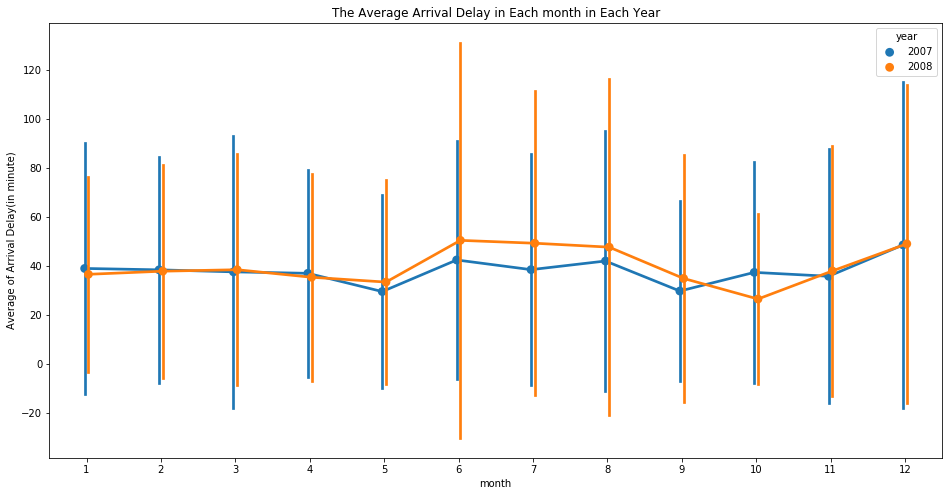

In [58]:
plt.figure(figsize=(16, 8));
sb.pointplot(data=delay_flight, x='month', y='arr_delay', hue='year', ci='sd', dodge=True);
plt.ylabel('Average of Arrival Delay(in minute)');
plt.title('The Average Arrival Delay in Each month in Each Year');

For year 2007 and 2008, the mean of arrival delay of corresponding months are pretty close. We can see that the peaks are in June, July, and August, September usually shows a valley of arrival delay, and December is another peak. The variation of error width in June and December are also wider. 

In [59]:
delay_flight.delay_cause.value_counts().index

Index(['nas_delay', 'late_aircraft_delay', 'carrier_delay', 'weather_delay',
       'security_delay'],
      dtype='object')

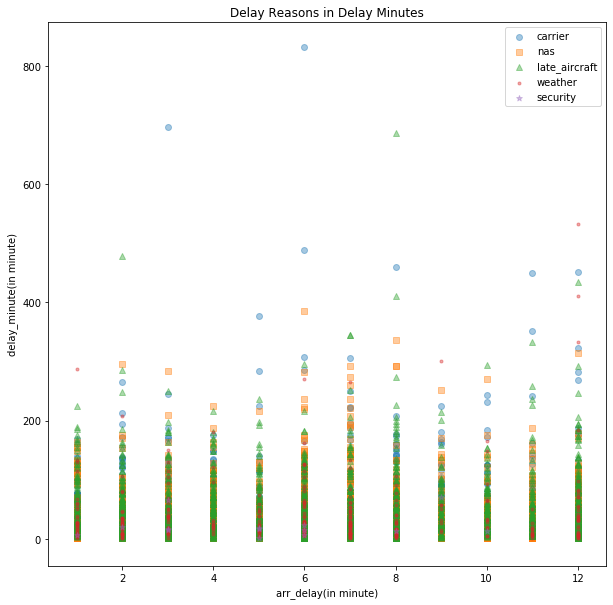

In [60]:
plt.figure(figsize=(10,10));
cat_markers = [['carrier_delay', 'o'],
               ['nas_delay', 's'], 
               ['late_aircraft_delay', '^'],
               ['weather_delay', '.'], 
               ['security_delay', '*']
              ]

for cat, marker in cat_markers:
    df_cat = delay_flight[delay_flight['delay_cause'] == cat]
    plt.scatter(data = df_cat, x = 'month', y = 'delay_minute', marker = marker, alpha=0.4);
plt.legend(['carrier','nas', 'late_aircraft', 'weather', 'security']);
plt.title('Delay Reasons in Delay Minutes');
plt.xlabel('arr_delay(in minute)');
plt.ylabel('delay_minute(in minute)');

This scatter plot of five delay causes in each month does not show very obvious patterns, but we can still see that the symbols on the top part have longer delay in minutes. In June, some carrier delays have very outstanding values, and in December, weather and carrier delay have the longest delays. 

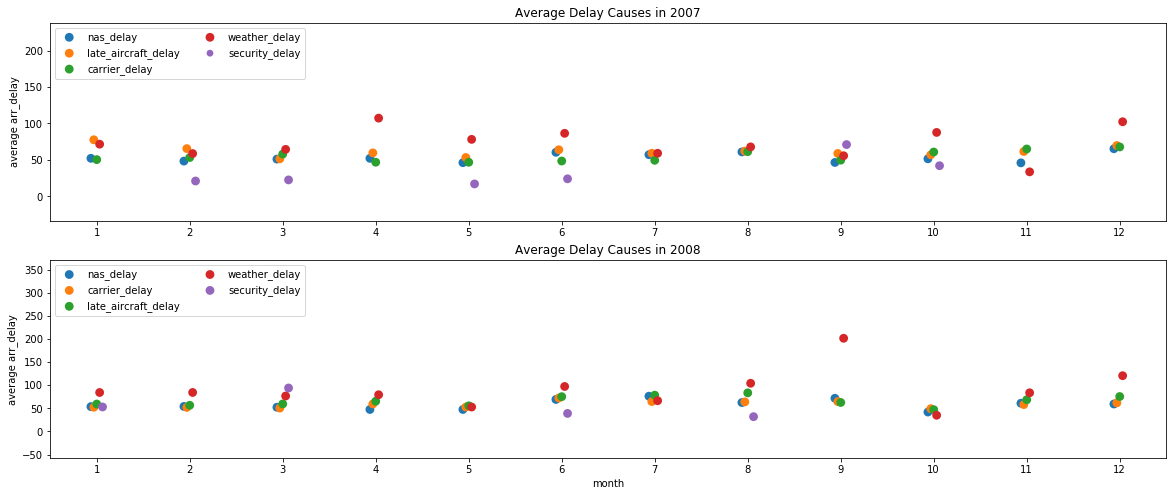

In [61]:
fig, ax = plt.subplots(nrows=2,figsize = [20,8]);

sb.pointplot(data=delay_flight[delay_flight.year=='2007'],x= 'month', y='arr_delay', 
             hue='delay_cause', ci='sd', dodge=True, linestyles=' ', errwidth=0, ax=ax[0]);
ax[0].set_ylabel('average arr_delay')
ax[0].set_xlabel(' ')
ax[0].set_title('Average Delay Causes in 2007')
ax[0].legend(ncol=2)

sb.pointplot(data=delay_flight[delay_flight.year=='2008'],x= 'month', y='arr_delay', 
             hue='delay_cause', ci='sd', dodge=True, linestyles=' ', errwidth=0, ax = ax[1])
plt.ylabel('average arr_delay')
plt.title('Average Delay Causes in 2008')
plt.legend(ncol=2)
plt.show()

In the above point plot, we have the year, month, delay cause and the average arrival delay in the same plot. We can compare the average arrival delay of the reasons in each year and in each month. In each year, the average delay of the flights was around 50 minutes. In 2007, the average security delay was the lowest among all, and the weather caused a high average delay in most months in the year, like March, April, May, June, August, October, December. In 2008, weather delay still had great effects on average delay and caused a higher average delay.  

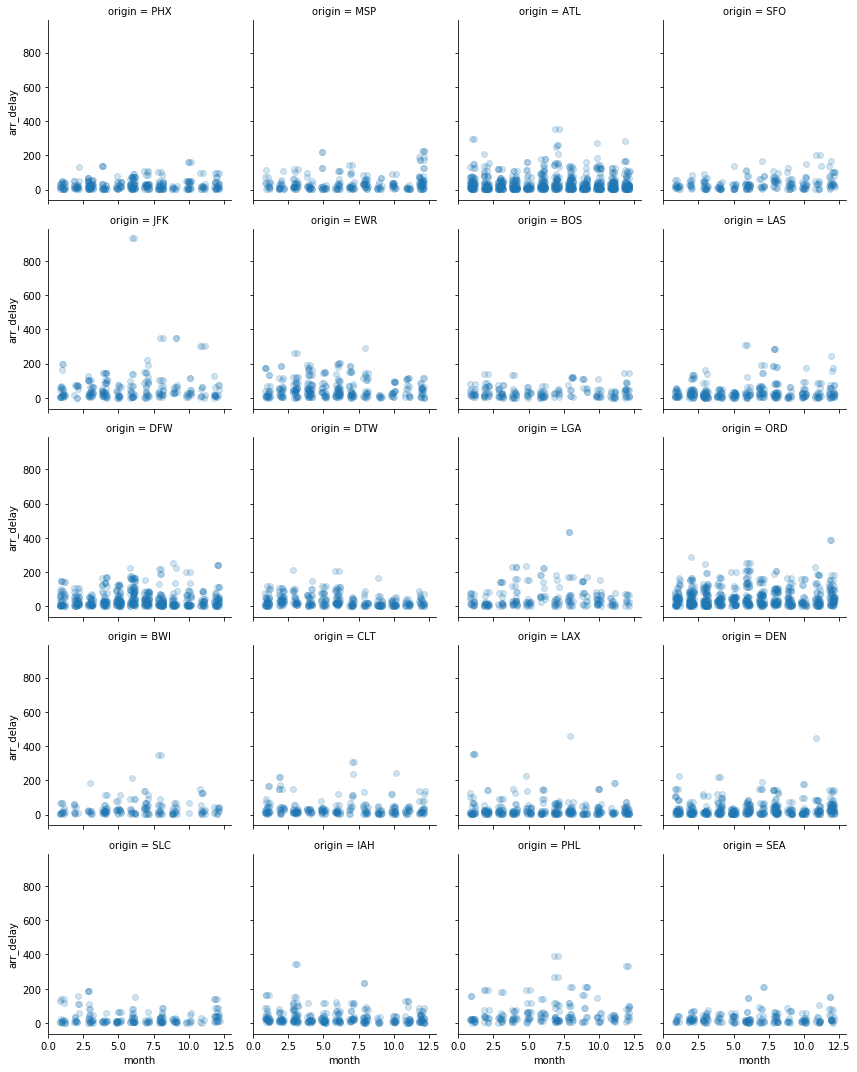

In [62]:
list=origin_20.index
origin_p=delay_flight.query('origin in list')
g = sb.FacetGrid(data = origin_p, col = 'origin', col_wrap=4, xlim=(0,13));
g.map(sb.regplot, 'month', 'arr_delay', x_jitter=0.2, scatter_kws={'alpha':1/5}, fit_reg=False);

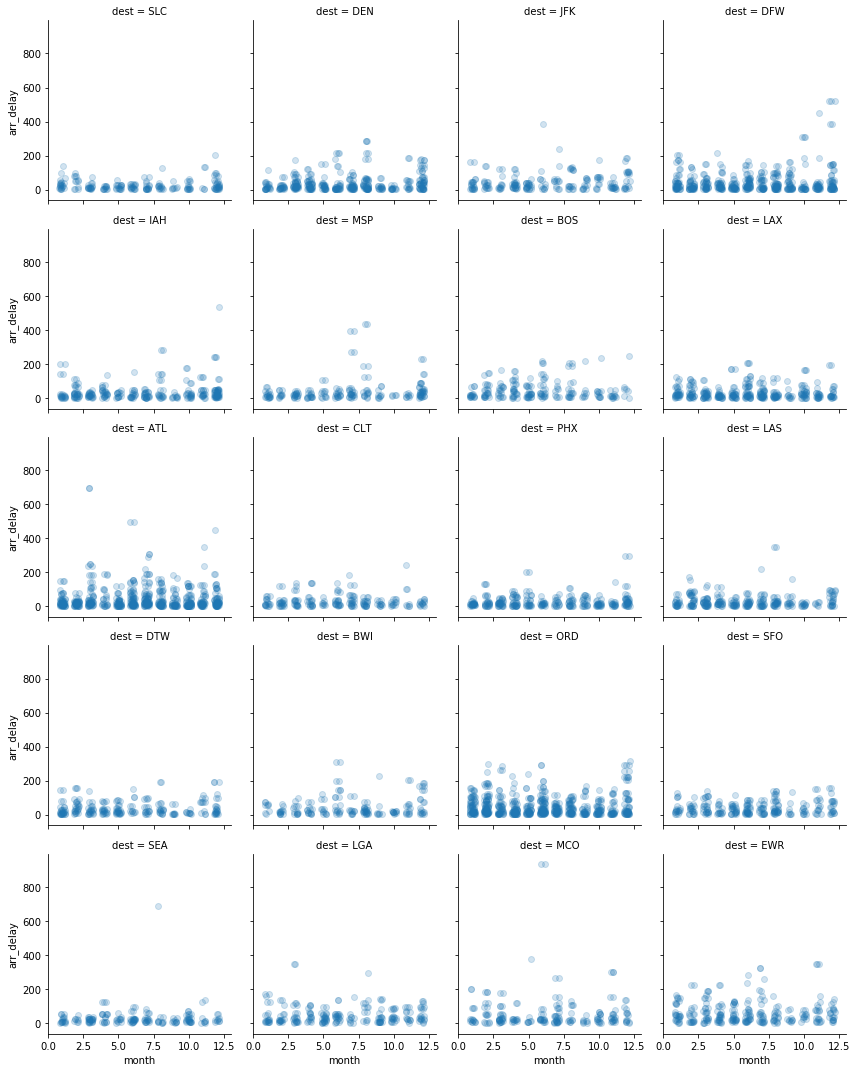

In [63]:
list=dest_20.index
dest_p=delay_flight.query('dest in list')
g = sb.FacetGrid(data = dest_p, col = 'dest', col_wrap=4, xlim=(0,13));
g.map(sb.regplot, 'month', 'arr_delay', x_jitter=0.2, scatter_kws={'alpha':1/5}, fit_reg=False);

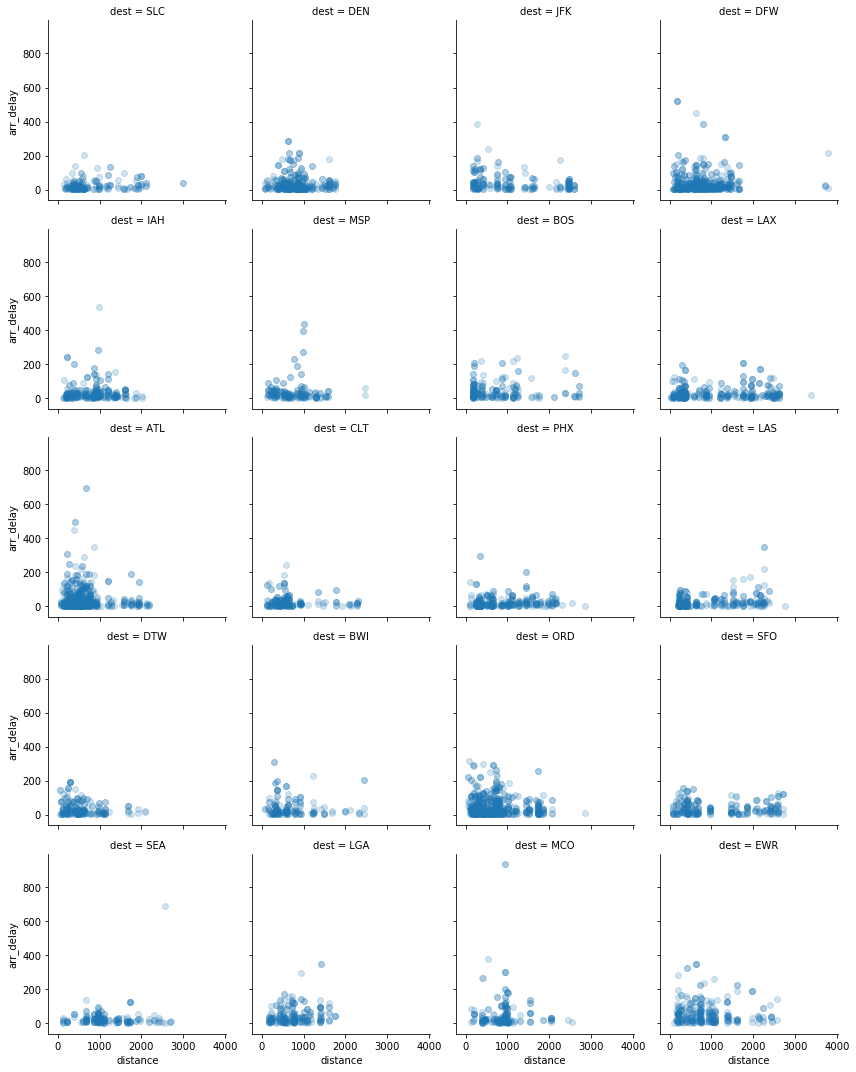

In [64]:
list=dest_20.index
dest_p=delay_flight.query('dest in list')
g = sb.FacetGrid(data = dest_p, col = 'dest', col_wrap=4);
g.map(sb.regplot, 'distance', 'arr_delay', x_jitter=0.2, scatter_kws={'alpha':1/5}, fit_reg=False);

The scatter plots of arrival delay for each airport over the year with random jitter on each month do not show a very strong pattern, but we can still see that most of the delays are around 0-200 minutes, some airports like ATL, ORD, DFW have pretty high density. The scatter plots of the arrive delay on distance show some interesting features. In the selected 20 airports which are the airports have the most delays at destination airports, we can see that the delays gather around the shorter distance other than longer distance trips. 

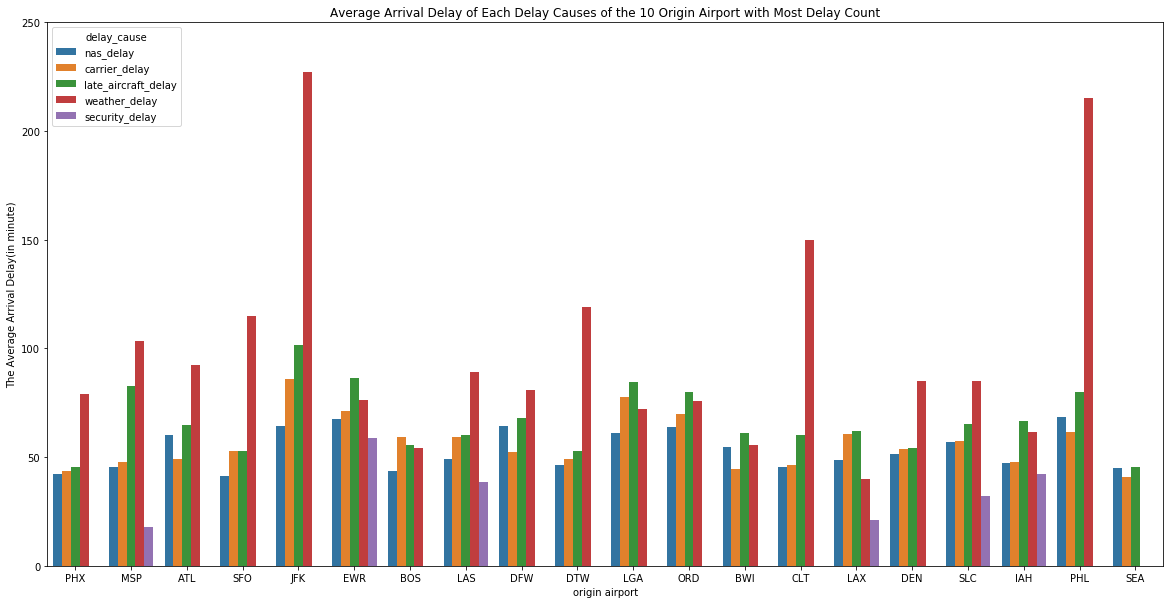

In [65]:
list=origin_20.index
origin_p_10=delay_flight.query('origin in list')
plt.figure(figsize=(20, 10));
sb.barplot(data=origin_p_10, x='origin', y='arr_delay', hue='delay_cause', ci='sd',errwidth=0);
plt.ylim(0,250);
plt.ylabel('The Average Arrival Delay(in minute)');
plt.xlabel('origin airport');
plt.title('Average Arrival Delay of Each Delay Causes of the 10 Origin Airport with Most Delay Count');

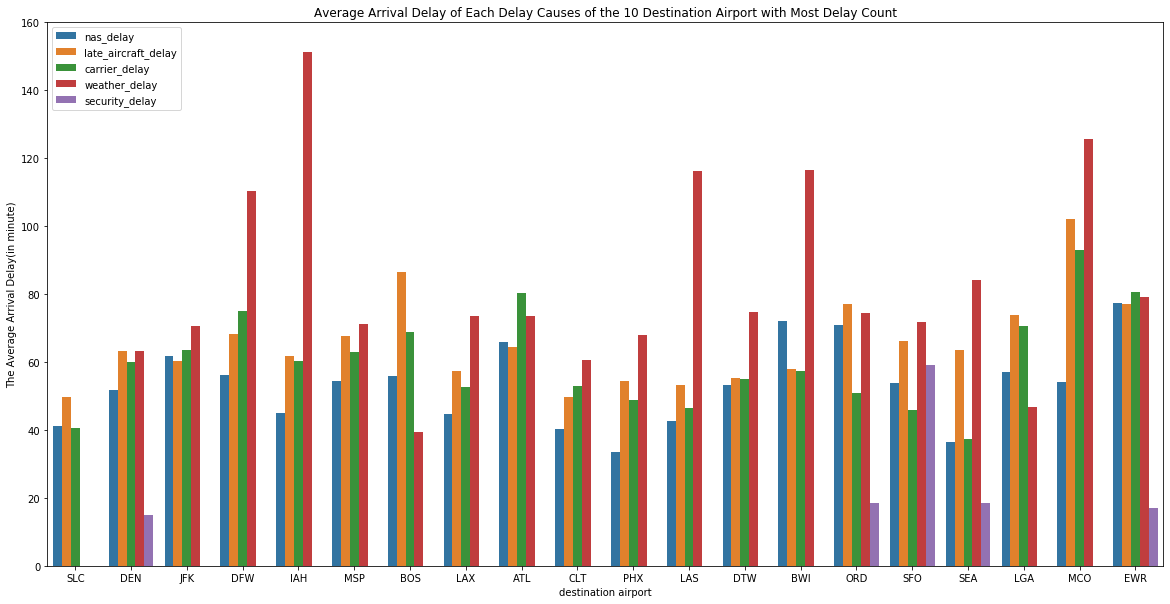

In [66]:
list=dest_20.index
dest_p_10=delay_flight.query('dest in list')
plt.figure(figsize=(20, 10));
sb.barplot(data=dest_p_10, x='dest', y='arr_delay', hue='delay_cause', ci='sd', errwidth=0);
plt.ylim(0,160);
plt.ylabel('The Average Arrival Delay(in minute)');
plt.xlabel('destination airport');
plt.title('Average Arrival Delay of Each Delay Causes of the 10 Destination Airport with Most Delay Count');
plt.legend(loc='upper left');

The seaborn bar charts show the mean of arrival delay in each airport and in each airport we are comparing the mean value of the 5 causes. 
The weather delay looks like a very outstanding aspect in all the selected airports, and security did not cause any delay in most of the airports. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
In this part, we looked at multiple variables together to see the relationship with arrival delay. In each month over the years 2007 and 2008, the average delay value don't have big variation, around 40 minutes delay in each month. When we view the delay cause average value by year, we can see more hidden details like on March 2008, security had caused the longest average delay, but security always has the least count and very low average data. 

### Were there any interesting or surprising interactions between features?
The dataset really gives very dynamic views and insights. We have explored the dataset at different angles. The arrival delay is the sum of each delay reasons. In term of the count, nas delay, WN count the most delays while weather delay and B6 have the highest value considering on average. When using the selected airports to explore the target variable, we can also see that weather delay act always as the top one in the average delay in minutes among all the causes. It is interesting that the flight delay happens more in short distance flights than longer-distance flights. To better understand the arrival delay variable, we'd better considering the aspects that we want to look into first. There is no relationship will fit all the features.  